# Task 2- Prediction using Unsupervised ML

Predict the optimum number of clusters and represent it visually

In [7]:
#importing all the libraries required
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np


In [8]:
#Load the dataset
iris_data=datasets.load_iris()
df_input_data=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
df_input_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
#Finding the optimum no of clusters
from sklearn.cluster import KMeans
k_range=range(1,8)
kmeans=[KMeans(n_clusters=i) for i in k_range]
kmeans

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max

In [11]:

score=[kmeans[i].fit(df_input_data).score(df_input_data) for i in range(len(kmeans))]
score

[-680.8244000000004,
 -152.3687064773386,
 -78.94084142614594,
 -57.344923809523884,
 -46.535582051282844,
 -38.93096304967232,
 -34.19846461871526]

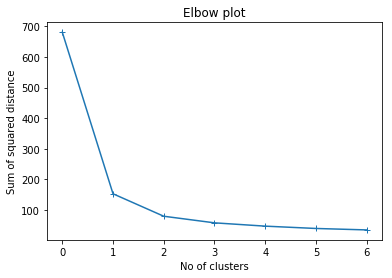

In [12]:
absolute_score=np.absolute(score)
plt.xlabel("No of clusters")
plt.ylabel("Sum of squared distance")
plt.title("Elbow plot")
plt.plot(absolute_score,marker="+")

In [ ]:
# As shown in the above graph the value of sum of squared distance (y-axis) is not changing significantly after 3 iteration 
#So here the optimum no of clusters=3

In [14]:
x=df_input_data.iloc[:, [0, 1, 2, 3]].values
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

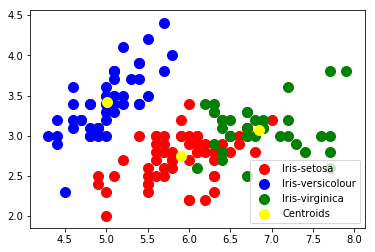

In [18]:
#Visualising the result

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()